In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Converting numerical values into categorical values.

#### Let us generate a thousand random normal points and plot the histogram

In [2]:
np.random.seed(4)
points = np.random.normal(0, 1, size=1000)

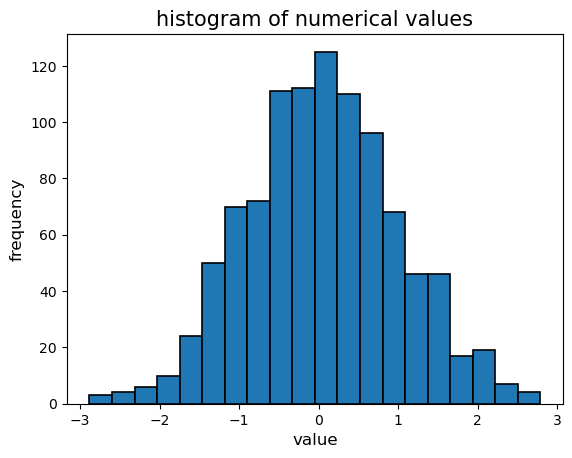

In [3]:
plt.hist(points, edgecolor='black', linewidth=1.2, bins = 20);
plt.xlabel("value", fontsize=12);
plt.ylabel("frequency", fontsize=12);
plt.title("histogram of numerical values", fontsize=15);

#### Now let us convert this variable into categories

##### For method one, let us fix the range of categories with hand. Let us have intervals: $(-\infty, -1], (-1, 0], (0,1], (1, \infty)$

In [4]:
#first make our original data a dataframe
data_dict = {"points": list(points)}
df = pd.DataFrame(data_dict, columns=['points'])

In [5]:
bins = [-np.inf, -1, 0, 1, np.inf]
names = ['manual_1', 'manual_2', 'manual_3', 'manual_4']
df['categorical_manual'] = pd.cut(df['points'], bins, labels=names)
df.head(6)

,points,categorical_manual
0,0.050562,manual_3
1,0.499951,manual_3
2,-0.995909,manual_2
3,0.693599,manual_3
4,-0.418302,manual_2
5,-1.584577,manual_1


In [6]:
# Now let us see how the histogram of the new categories looks like
counts = []
for i in range(len(names)):
    name = names[i]
    counts.append(np.sum(df.categorical_manual == name))

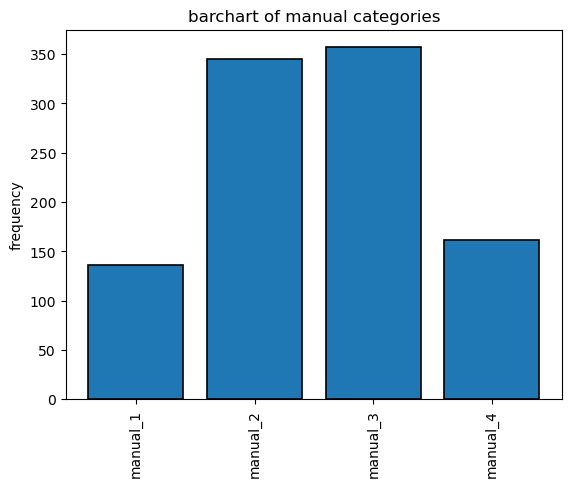

In [7]:
y_pos = range(len(names))
plt.bar(y_pos, counts, edgecolor='black', linewidth=1.2,)
# Rotation of the bars names
plt.xticks(y_pos, names, rotation=90);
plt.ylabel("frequency");
plt.title("barchart of manual categories");

##### Now, for method 2 find the minimum and maximum values in `points` and divide them into 4 equally large intervals. 
Equally large does not mean in terms of how many points fall into these groups, but the width of their ranges.

In [8]:
min_point = np.min(points)
max_point = np.max(points)
width = (max_point - min_point)/4

In [9]:
bins = [min_point-0.1, min_point + width, min_point + 2*width,min_point + 3*width, max_point + 0.1]
names = ['equal_1', 'equal_2', 'equal_3', 'equal_4']
df['categorical_equal_len'] = pd.cut(df['points'], bins, labels=names)

In [10]:
# Now let us see how the histogram of the new categories looks like
counts = []
for i in range(len(names)):
    name = names[i]
    counts.append(np.sum(df.categorical_equal_len == name))

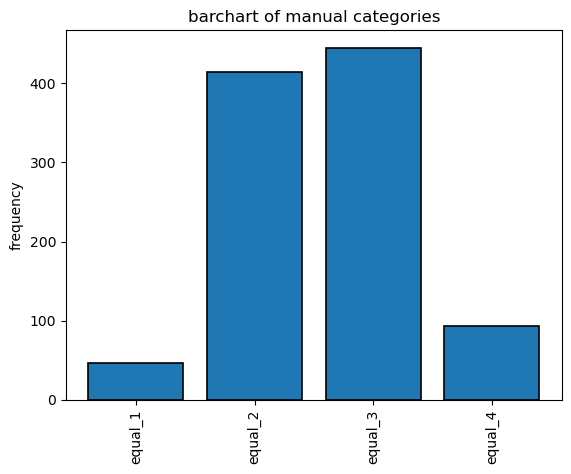

In [11]:
y_pos = range(len(names))
plt.bar(y_pos, counts, edgecolor='black', linewidth=1.2,)
# Rotation of the bars names
plt.xticks(y_pos, names, rotation=90);
plt.ylabel("frequency");
plt.title("barchart of manual categories");

##### Method 3: Finally, split them so that every bin comprises equally many number of instances.

In [12]:
names = ["freq_1","freq_2","freq_3","freq_4"]
df['categorical_equal_freq'] = pd.qcut(df['points'], 4, labels=names)

In [13]:
# Now let us see how the histogram of the new categories looks like
counts = []
for i in range(len(names)):
    name = names[i]
    counts.append(np.sum(df.categorical_equal_freq == name))

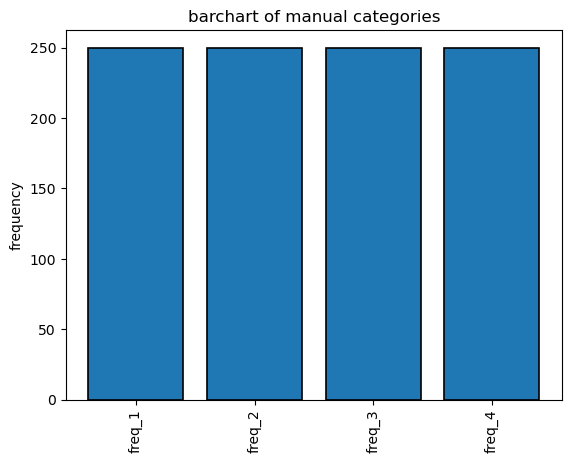

In [14]:
y_pos = range(len(names))
plt.bar(y_pos, counts, edgecolor='black', linewidth=1.2,)
# Rotation of the bars names
plt.xticks(y_pos, names, rotation=90);
plt.ylabel("frequency");
plt.title("barchart of manual categories");

In [15]:
df.head(10)

,points,categorical_manual,categorical_equal_len,categorical_equal_freq
0,0.050562,manual_3,equal_3,freq_3
1,0.499951,manual_3,equal_3,freq_3
2,-0.995909,manual_2,equal_2,freq_1
3,0.693599,manual_3,equal_3,freq_4
4,-0.418302,manual_2,equal_2,freq_2
5,-1.584577,manual_1,equal_1,freq_1
6,-0.647707,manual_2,equal_2,freq_1
7,0.598575,manual_3,equal_3,freq_3
8,0.332250,manual_3,equal_3,freq_3
9,-1.147477,manual_1,equal_2,freq_1


Here you can observe how the categorical numbers differ for instances 2, 3, 6, 9

#### Question: Use `qcut` function as above to obtain four categories, but use quantiles 30-50-90-100
- Hint: check the use of `q` on the [documentation of qcut function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

In [16]:
# Convert the variable into categories using qcut with specified quantiles
quantiles = [0, 0.30, 0.50, 0.90, 1.00]
categories = pd.qcut(points, q=quantiles)

In [17]:
# Display the categories
print(categories.value_counts())

(-2.884, -0.452]    300
(-0.452, 0.05]      200
(0.05, 1.319]       400
(1.319, 2.787]      100
dtype: int64


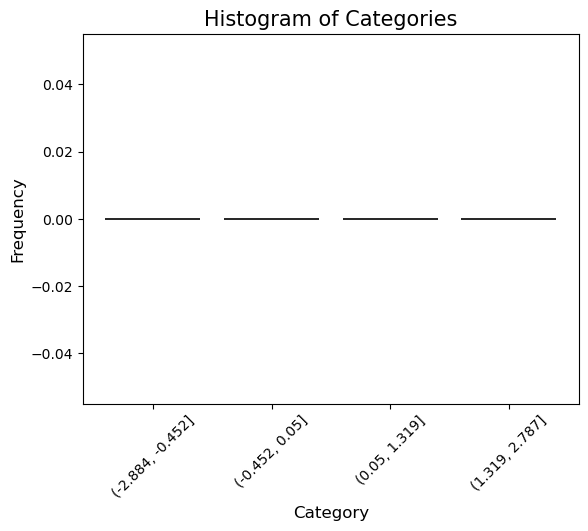

In [21]:
# Convert the categorical data to a list of category labels
category_labels = categories.categories.astype(str)

# Count the occurrences of each category
category_counts = categories.value_counts()

# Create a list of frequencies for each category based on category_labels
category_frequencies = [category_counts.get(label, 0) for label in category_labels]

# Plot the histogram of the categories
plt.bar(category_labels, category_frequencies, edgecolor='black', linewidth=1.2)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Categories", fontsize=15)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()